<a href="https://colab.research.google.com/github/lukaszplust/Machine-Learning/blob/main/chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np

np.random.seed(42)

m = 100# number of instances

X = 2 *np.random.rand(m, 1) # max is <2, because 0.99999 * 2 < 2

y = 4 + 3*X + np.random.rand(m, 1)# 3*X <6 ,   5.99 +4 + 0.99 (max value prediction)

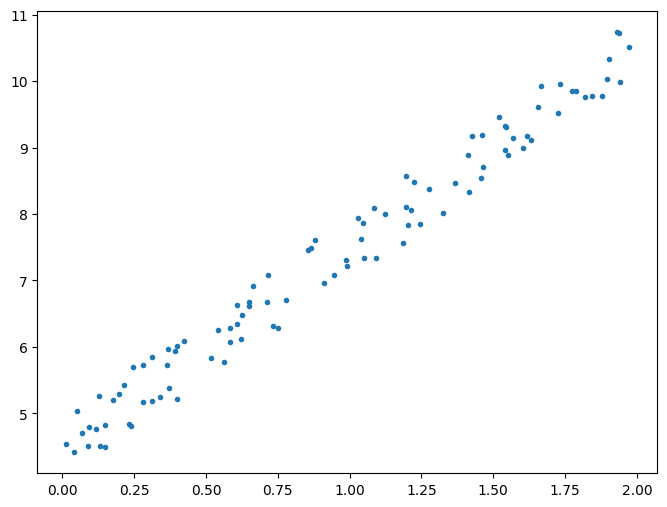

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

plt.plot(X,y, ".")

plt.show()

theta_best = value that minimazies the cost function

y = vector of target values

theta_best = (X.T * X)^-1 * X.T * y

In [28]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)# add 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [29]:
X[:2]

array([[0.74908024],
       [1.90142861]])

In [30]:
X_b[:2]

array([[1.        , 0.74908024],
       [1.        , 1.90142861]])

Theta[0] is bias. (intercept) (pl:wyraz wolny)

Theta[1] is slope coefficinet (pl: wspolczynnik kierunkowy)

In [31]:
theta_best

array([[4.51359766],
       [2.98323418]])

Thats close to thats what we used to generate the data is y = 4 + 3*x + Gaussian noise

In [41]:
X_new = np.array([[0], [2]]) # feature vector (maybe?)

X_new_b = add_dummy_feature(X_new)


In [42]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [43]:
y_predict = X_new_b @ theta_best

In [44]:
y_predict

array([[ 4.51359766],
       [10.48006601]])

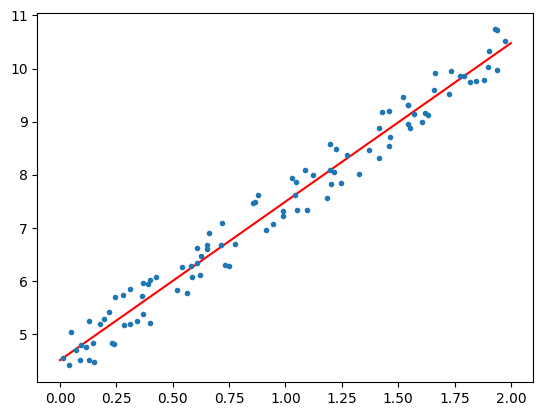

In [45]:
plt.plot(X_new, y_predict, "r-", label="Predictions")

plt.plot(X,y, ".")
plt.show()